In [1]:
import os
import datetime as dt
import pandas as pd
#from arcgis.gis import GIS
import numpy as np
#import seaborn as sns

 

PRCRCityworks = pd.read_csv('000PRCRLast180_clean.csv',sep=',') # check the csv file before to know that 'comma' here is ';'

print(PRCRCityworks.head(3))

print(list(PRCRCityworks.columns))# show the features and label

print(PRCRCityworks.shape) # instances vs features + label (4521, 17)

                           Description  WoCost  WoLaborCost  WoMatCost  \
0  Parks Greenway Structure Inspection  98.860       52.050        0.0   
1                        Daily Pool PM  50.590       29.790        0.0   
2                  HVAC System Service  25.295       14.895        0.0   

   WoEquipCost  
0        46.81  
1        20.80  
2        10.40  
['Description', 'WoCost', 'WoLaborCost', 'WoMatCost', 'WoEquipCost']
(11403, 5)


/home/peter/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/peter/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

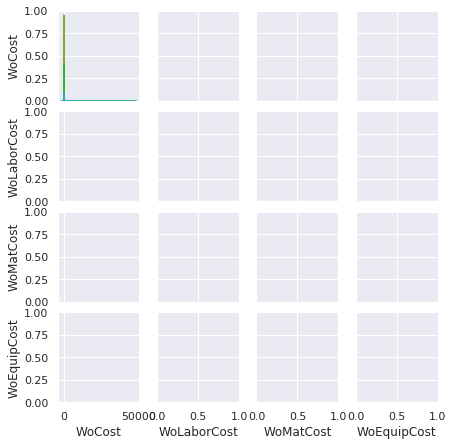

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(PRCRCityworks, hue='Description', height=1.5);



In [9]:
#clean bad data
# https://stackoverflow.com/questions/29314033/drop-rows-containing-empty-cells-from-a-pandas-dataframe
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

PRCRCityworks['WoCost'].replace('', 0, inplace=True)
PRCRCityworks['WoLaborCost'].replace('', 0, inplace=True)
PRCRCityworks['WoMatCost'].replace('', 0, inplace=True)
PRCRCityworks['WoEquipCost'].replace('', 0, inplace=True)

PRCRCityworks.dropna()


,Description,WoCost,WoLaborCost,WoMatCost,WoEquipCost
0,Parks Greenway Structure Inspection,98.860,52.050,0.0,46.810
1,Daily Pool PM,50.590,29.790,0.0,20.800
2,HVAC System Service,25.295,14.895,0.0,10.400
3,Parks Construction Service,410.560,327.360,0.0,83.200
4,Parks Winter Maintenance,1596.020,937.220,0.0,658.800
...,...,...,...,...,...
11398,Parks Grounds Maintenance,168.630,75.195,0.0,93.435
11399,Parks Dog Park Service,66.685,18.570,28.0,20.115
11400,Parks Grounds Maintenance,84.970,62.800,0.0,22.170
11401,Parks Grounds Maintenance,260.810,127.550,0.0,133.260


In [11]:
X_PRCR = PRCRCityworks.drop('Description', axis=1)
X_PRCR.shape



(11403, 4)

In [12]:
# Unsupervised example
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_PRCR)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_PRCR)         # 4. Transform the data to t

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').